<a href="https://colab.research.google.com/github/AlexBB999/junk/blob/master/NYC_Health3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kmodes

In [2]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.6/dist-packages (0.10.2)


In [0]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sqlalchemy import create_engine
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import statsmodels.api as sm
from collections import Counter

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import time

from sklearn.datasets import fetch_openml
import umap
import pandas_profiling
from kmodes.kmodes import KModes

In [4]:

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
health=pd.read_csv('/content/drive/My Drive/Patient_Characteristics_Survey__PCS___2017.csv')

In [6]:
health.shape

(187192, 67)

In [7]:
health.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NOT MI - OTHER,YES,YES,NO,NO,YES,UNKNOWN,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,132
1,2017,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,YES,UNKNOWN,UNKNOWN,NO,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,YES,MENTAL ILLNESS,UNKNOWN,YES,UNKNOWN,NO,NO,YES,YES,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,UNKNOWN,146
2,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,YES,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NOT MI - OTHER,NO,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,131
3,2017,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,YES,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,112
4,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,NO,"UNEMPLOYED, LOOKING FOR WORK",NOT APPLICABLE,SOME COLLEGE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,YES,YES,YES,MENTAL ILLNESS,MENTAL ILLNESS,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,NO,130


In [0]:
#pandas_profiling.ProfileReport(health)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
#health.info()

In [8]:
health['Program Category'].value_counts()

OUTPATIENT     126064
RESIDENTIAL     28734
SUPPORT         19411
INPATIENT        9282
EMERGENCY        3701
Name: Program Category, dtype: int64

In [0]:
#health.isna().sum()

/////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
pip install hdbscan

     |████████████████████████████████| 4.7MB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2361285 sha256=b382c7a116601f5317aabfb2e1763da2e64db4d14f23afffd8bb8abd4da86c1a
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [0]:
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [0]:
#standard_embedding = umap.UMAP(random_state=42).fit_transform(health)
#plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target, s=0.1, cmap='Spectral');

**////////////////////////////////////////////////////////////////////////////////**/////

In [0]:
u=[health[x].nunique(dropna=False)  for x in list(health)]

In [0]:
z=zip(u,list(health))

In [0]:
#list(z)

In [0]:
health['Special Education Services'].value_counts(dropna=False)

NOT APPLICABLE    150514
NO                 17348
YES                16082
UNKNOWN             3248
Name: Special Education Services, dtype: int64

In [12]:
health['Special Education Services'].str.count('NOT APPLICABLE').sum()

150514

In [13]:
not_applicable=[np.sum(health[col] == 'NOT APPLICABLE') for col in list(health)]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


a=[health[x]=='NOT APPLICABLE'  for x in list(health)]

In [0]:
z2=zip(not_applicable,list(health))
lz=list(z2)
#lz

In [0]:
health.drop(['Survey Year','Three Digit Residence Zip Code','Number Of Hours Worked Each Week','Special Education Services'],1,inplace=True)

In [16]:
health.shape

(187192, 63)

new_df = df[~df["col"].str.contains(word)]

df[~df.C.str.contains("XYZ")]

In [0]:
health2 = health[~health['Medicaid Managed Insurance'].str.contains('NOT APPLICABLE')]

In [18]:
health2.shape

(137502, 63)

In [0]:
not_applicable=[np.sum(health2[col] == 'NOT APPLICABLE') for col in list(health2)]

In [20]:
z3=zip(not_applicable,list(health2))
lz3=list(z3)
lz3

[(0, 'Program Category'),
 (0, 'Region Served'),
 (0, 'Age Group'),
 (0, 'Sex'),
 (0, 'Transgender'),
 (0, 'Sexual Orientation'),
 (0, 'Hispanic Ethnicity'),
 (0, 'Race'),
 (0, 'Living Situation'),
 (26023, 'Household Composition'),
 (0, 'Preferred Language'),
 (0, 'Veteran Status'),
 (0, 'Employment Status'),
 (0, 'Education Status'),
 (0, 'Mental Illness'),
 (0, 'Intellectual Disability'),
 (0, 'Autism Spectrum'),
 (0, 'Other Developmental Disability'),
 (0, 'Alcohol Related Disorder'),
 (0, 'Drug Substance Disorder'),
 (0, 'Mobility Impairment Disorder'),
 (0, 'Hearing Visual Impairment'),
 (0, 'Hyperlipidemia'),
 (0, 'High Blood Pressure'),
 (0, 'Diabetes'),
 (0, 'Obesity'),
 (0, 'Heart Attack'),
 (0, 'Stroke'),
 (0, 'Other Cardiac'),
 (0, 'Pulmonary Asthma'),
 (0, 'Alzheimer or Dementia'),
 (0, 'Kidney Disease'),
 (0, 'Liver Disease'),
 (0, 'Endocrine Condition'),
 (0, 'Neurological Condition'),
 (0, 'Traumatic Brain Injury'),
 (0, 'Joint Disease'),
 (0, 'Cancer'),
 (0, 'Other Chr

In [21]:
health2['Medicaid Managed Insurance'].value_counts()

YES        82609
NO         39975
UNKNOWN    14918
Name: Medicaid Managed Insurance, dtype: int64

In [22]:
health2['Household Composition'].value_counts()

COHABITATES WITH OTHERS    73594
LIVES ALONE                31084
NOT APPLICABLE             26023
UNKNOWN                     6801
Name: Household Composition, dtype: int64

In [0]:
health3 = health2[~health2['Household Composition'].str.contains('NOT APPLICABLE')]

In [0]:
not_applicable3=[np.sum(health3[col] == 'NOT APPLICABLE') for col in list(health3)]

In [0]:
z33=zip(not_applicable3,list(health3))
listz33=list(z33)
#listz33

In [0]:
health3.shape

(111479, 63)

In [0]:
health_dummies = pd.get_dummies(health3)

In [28]:
health_dummies.shape

(111479, 207)

##**UMAP**

In [0]:
!pip install umap-learn


In [0]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(health_dummies)

In [0]:
import umap

In [0]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(health_dummies)

/usr/local/lib/python3.6/dist-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndes

In [0]:
umap_results

array([[12.104816  , -2.5959058 ],
       [11.94813   ,  8.07227   ],
       [ 9.5758915 , -1.9450155 ],
       ...,
       [10.870339  , -2.3616564 ],
       [ 7.2217054 ,  0.12646377],
       [16.716503  , -0.6388486 ]], dtype=float32)

In [0]:
umap_results.shape

(111479, 2)

In [0]:
reducer = umap.UMAP(random_state=42)
reducer.fit(health_dummies)

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(p

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [0]:
standard_embedding = reducer.transform(health_dummies)

In [0]:
embedding


array([[ 3.0383363, -1.6489046],
       [ 9.633529 ,  3.1783004],
       [ 3.635198 , -0.9511818],
       ...,
       [ 2.7818737, -2.1610403],
       [ 3.1837895, -4.6135902],
       [11.783654 , -7.0666246]], dtype=float32)

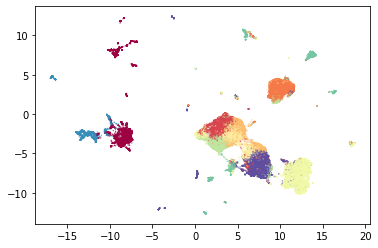

In [0]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');


In [0]:
kmeans_labels.shape

(111479,)

In [0]:
kmeans_labels

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(health_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [0]:
#kmeans.cluster_centers_

In [0]:
#print(kmeans.cluster_centers_)

In [0]:
#plt.scatter(health_dummies[:,0],health_dummies[:,1], c=kmeans.labels_, cmap='rainbow')

**/////////////////////////////////////////////////////////////////////////////////////////////**

**PCA**

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

km.fit(health_dummies)

km_pred = km.predict(health_dummies)

In [0]:
health_dummies['Cluster'] = km_pred

In [0]:
health_dummies.tail()

,Program Category_EMERGENCY,Program Category_INPATIENT,Program Category_OUTPATIENT,Program Category_RESIDENTIAL,Program Category_SUPPORT,Region Served_CENTRAL NY REGION,Region Served_HUDSON RIVER REGION,Region Served_LONG ISLAND REGION,Region Served_NEW YORK CITY REGION,Region Served_WESTERN REGION,Age Group_ADULT,Age Group_CHILD,Age Group_UNKNOWN,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN,Transgender_CLIENT DIDN'T ANSWER,"Transgender_NO, NOT TRANSGENDER",Transgender_UNKNOWN,"Transgender_YES, TRANSGENDER",Sexual Orientation_BISEXUAL,Sexual Orientation_CLIENT DID NOT ANSWER,Sexual Orientation_LESBIAN OR GAY,Sexual Orientation_OTHER,Sexual Orientation_STRAIGHT OR HETEROSEXUAL,Sexual Orientation_UNKNOWN,"Hispanic Ethnicity_NO, NOT HISPANIC/LATINO",Hispanic Ethnicity_UNKNOWN,"Hispanic Ethnicity_YES, HISPANIC/LATINO",Race_BLACK ONLY,Race_MULTI-RACIAL,Race_OTHER,Race_UNKNOWN RACE,Race_WHITE ONLY,Living Situation_PRIVATE RESIDENCE,Living Situation_UNKNOWN,Household Composition_COHABITATES WITH OTHERS,Household Composition_LIVES ALONE,Household Composition_UNKNOWN,Preferred Language_AFRO-ASIATIC,...,SSDI Cash Assistance_NO,SSDI Cash Assistance_UNKNOWN,SSDI Cash Assistance_YES,Veterans Disability Benefits_NO,Veterans Disability Benefits_UNKNOWN,Veterans Disability Benefits_YES,Veterans Cash Assistance_NO,Veterans Cash Assistance_UNKNOWN,Veterans Cash Assistance_YES,Public Assistance Cash Program_NO,Public Assistance Cash Program_UNKNOWN,Public Assistance Cash Program_YES,Other Cash Benefits_NO,Other Cash Benefits_UNKNOWN,Other Cash Benefits_YES,Medicaid and Medicare Insurance_NO,Medicaid and Medicare Insurance_UNKNOWN,Medicaid and Medicare Insurance_YES,Unknown Insurance Coverage_NO,No Insurance_NO,Medicaid Insurance_YES,Medicaid Managed Insurance_NO,Medicaid Managed Insurance_UNKNOWN,Medicaid Managed Insurance_YES,Medicare Insurance_NO,Medicare Insurance_UNKNOWN,Medicare Insurance_YES,Private Insurance_NO,Private Insurance_UNKNOWN,Private Insurance_YES,Child Health Plus Insurance_NO,Child Health Plus Insurance_UNKNOWN,Child Health Plus Insurance_YES,Other Insurance_NO,Other Insurance_UNKNOWN,Other Insurance_YES,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Criminal Justice Status_YES,Cluster
187176,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,2
187177,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,2
187181,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
187184,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,2
187191,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


**/////////////////////////////////////////////////////////////////////////////**

**///////////////////////////////////////////////////////////////////////////**

##**KMODES**

In [0]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)